In [3]:
import sys
sys.path.append(r"C:\\Users\\QPG\\Downloads\\hardware_control3-master\\hardware_control3-master\\hardware_control3")
import datetime
import numpy as np
from scipy.optimize import *
from santectsl570 import SantecTSL570


### Configure laser & sweep parameters ###
laser = SantecTSL570("GPIB0::19::INSTR")
startWav = laser.get_wavelength()
lamStart = 1515
lamStop = 1525
pwr = 13
speed = 10 #nm/s
trigStep = .002 #output trigger pulse ever X nm
laser.enable_output_trigger(trigStep=trigStep)
scanMode = 1 # one-way continuous scan
nSweeps = 1
tSweep = (lamStop-lamStart)/speed
wav = np.arange(lamStart,lamStop+trigStep,trigStep)

print(laser.wl0)

for i in range(nSweeps):    
    # laser.wavelength_sweep(lamStart,lamStop,pwr,scanMode,speed) #start sweep
    laser.set_wavelength(1550)
    print(laser.get_wavelength())
    print(laser.instr.query('*TST?'))


1.55e-06
1.55e-06
+0


In [4]:
import pyvisa as visa
rm = visa.ResourceManager()
address = "GPIB0::19::INSTR"
instr = rm.open_resource(address)
name = instr.query('*IDN?')

pw = 13

instr.write(f'SOUR:POW {pw}')


13

In [5]:
import pyvisa as visa
import time

rm = visa.ResourceManager()
address = "GPIB0::19::INSTR"
instr = rm.open_resource(address)
name = instr.query('*IDN?')

start_wl = 1500
stop_wl  = 1540
wl = start_wl
step = 0.2
mode = 1
speed = 200

instr.write(f'SOUR:WAV:SWE:STAR {start_wl}nm')
instr.write(f'SOUR:WAV:SWE:STOP {stop_wl}nm')
instr.write(f'SOUR:WAV:SWE:MOD {mode}')
instr.write(f'SOUR:WAV:SWE:SPE {speed}')
instr.write('SOUR:WAV:SWE:STAT 1')

while(int(instr.query('SOUR:WAV:SWE?')) != 0):
    pass

Wavelength: 1545 nm, Intensity: 0.40243027951871196
Wavelength: 1545 nm, Intensity: 0.3033035203135891
Wavelength: 1545.01 nm, Intensity: 0.3920743407922317
Wavelength: 1545.01 nm, Intensity: 0.316203193646021
Wavelength: 1545.02 nm, Intensity: 0.3953124226549103
Wavelength: 1545.02 nm, Intensity: 0.3157030022246882
Wavelength: 1545.03 nm, Intensity: 0.4176071434644111
Wavelength: 1545.03 nm, Intensity: 0.2956723106643502
Wavelength: 1545.04 nm, Intensity: 0.42740694879390806
Wavelength: 1545.04 nm, Intensity: 0.2991045450886732
Wavelength: 1545.05 nm, Intensity: 0.4163435016925681
Wavelength: 1545.05 nm, Intensity: 0.29232563531873035
Wavelength: 1545.06 nm, Intensity: 0.40476999116223533
Wavelength: 1545.06 nm, Intensity: 0.28699793882214303
Wavelength: 1545.07 nm, Intensity: 0.4081166673335297
Wavelength: 1545.07 nm, Intensity: 0.2930035262915339
Wavelength: 1545.08 nm, Intensity: 0.41278292776222103
Wavelength: 1545.08 nm, Intensity: 0.30140476740568295
Wavelength: 1545.09 nm, Inte

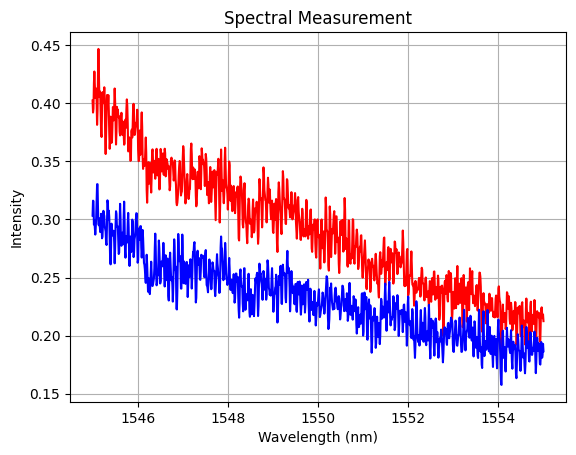

In [32]:
import nidaqmx
import time
from santectsl570 import SantecTSL570
import matplotlib.pyplot as plt
import numpy as np

# Configure laser & sweep parameters
laser = SantecTSL570("GPIB0::19")

task = nidaqmx.Task()  # Instantiate the NI DAQ

task.ai_channels.add_ai_voltage_chan("Dev1/ai16:17")  # Read out and add the voltage of the channel AI0 which corresponds to Out(1,0)

start_wl = 1545
stop_wl = 1555

wl = start_wl
laser.set_wavelength(start_wl)

sampling_rate = 200000
n_sample = 50

wavelengths = []  # List to store wavelengths
intensities = [[],[]]  # List to store intensities

try:
    while wl < stop_wl:
        # Configure the sampling
        task.timing.cfg_samp_clk_timing(rate=sampling_rate, samps_per_chan=n_sample)
        
        # Read out the task
        data = task.read(number_of_samples_per_channel=n_sample)
        
        for i in range(2):
            # Calculate and append the mean data value
            voltage = data[i]
            mean_value = np.mean(voltage)
            intensities[i].append(mean_value)  # Append intensity
            print(f"Wavelength: {wl} nm, Intensity: {mean_value}")

        wavelengths.append(wl)  # Append current wavelength        
        # Update the wavelength and wait
        wl += 0.01  # nm
        laser.set_wavelength(wl)
        time.sleep(0.01)

    laser.set_wavelength(1550)

    # Plot the acquired data
    plt.plot(wavelengths, intensities[0],color = 'r')
    plt.plot(wavelengths, intensities[1],color = 'b')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity")
    plt.title("Spectral Measurement")
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    task.close()  # Close the DAQ task


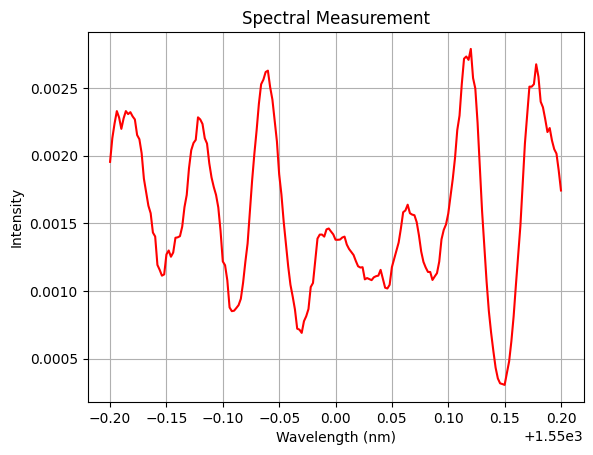

In [11]:
# Plot the acquired data
plt.plot(wavelengths, intensities,color = 'r')

plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity")
plt.title("Spectral Measurement")
plt.grid(True)
plt.show()

In [27]:
print(wavelengths[0:5])
print(intensities[0:5])


[1549.8, 1549.802, 1549.8039999999999, 1549.8059999999998, 1549.8079999999998]
[0.0019534963840697095, 0.0021283164870977526, 0.0022373219631203613, 0.0023282284167219463, 0.002280924153537139]
